# Programming Task 3  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 at 11:59pm   




# Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


# Load the data
df = pd.read_csv('data\data.csv')

# Print the shape of the DataFrame
print('The DataFrame has', df.shape[0], 'rows and', df.shape[1], 'columns.\n')

# Display the first few rows of the DataFrame
df.head()

# To check null values
# df.isna().sum()


The DataFrame has 2000 rows and 8 columns.



,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
# Drop unnecessary column ('ID' in this case)
df.drop('ID', axis=1, inplace=True)

# Calculate and display summary statistics for the DataFrame
summary_stats = df.agg(['mean', 'min', 'max'])
summary_stats

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,0.457,0.4965,35.909,1.038,120954.419,0.8105,0.739
min,0.000,0.0000,18.000,0.000,35832.000,0.0000,0.000
max,1.000,1.0000,76.000,3.000,309364.000,2.0000,2.000


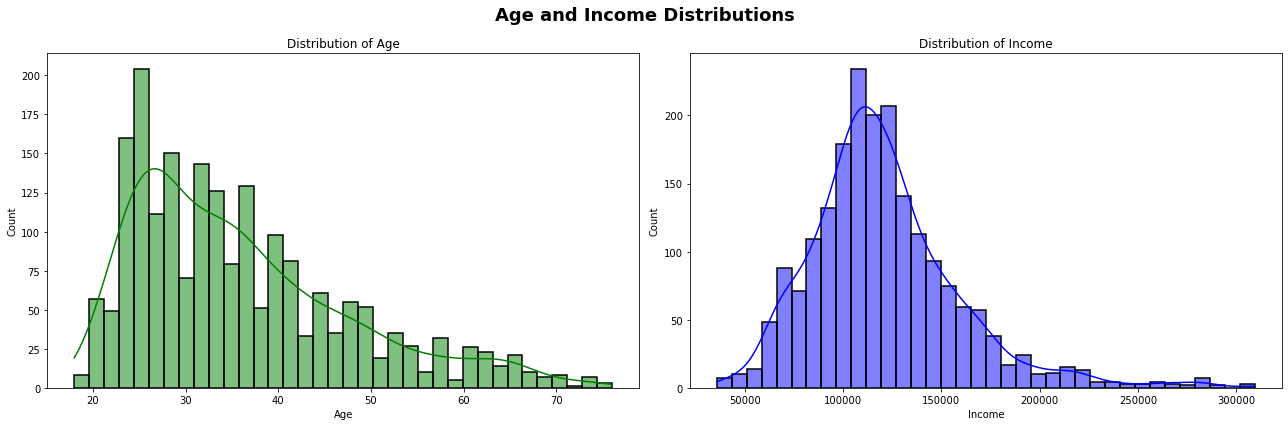

In [3]:
#---------------------------------------------------------------
# -------------Plot histograms of Age and Income----------------
#---------------------------------------------------------------

# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Create histogram of Age in the first subplot
sns.histplot(ax=axs[0], data=df, x='Age', kde=True, color="green", bins=int(180/5), edgecolor='black', linewidth=1.5)
axs[0].set_title('Distribution of Age')

# Create histogram of Income in the second subplot
sns.histplot(ax=axs[1], data=df, x='Income', kde=True, color="blue", bins=int(180/5), edgecolor='black', linewidth=1.5)
axs[1].set_title('Distribution of Income')

# Set the main title for the figure
plt.suptitle('Age and Income Distributions',fontsize=18, fontweight='bold')

# Adjust the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


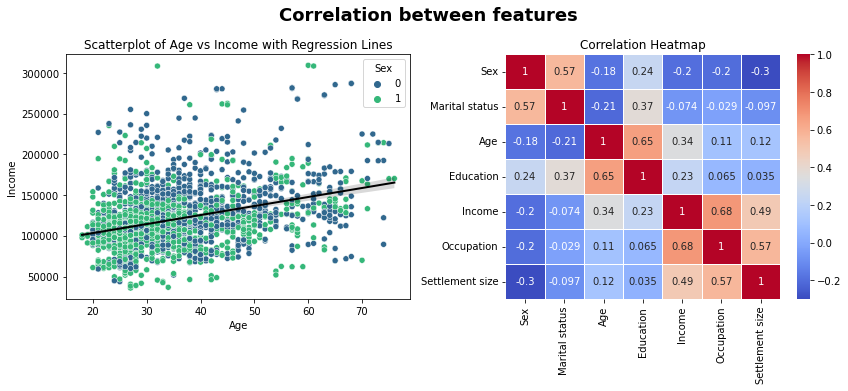

In [4]:
#-------------------------------------------------------------------------
#--------------Ploting Scatterplot and Correlation Heatmap----------------
#-------------------------------------------------------------------------

# Compute the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

# Create scatterplot of Age vs Income in the first subplot
sns.scatterplot(ax=axs[0], data=df, x='Age', y='Income', hue='Sex', palette='viridis')
sns.regplot(ax=axs[0], data=df, x='Age', y='Income', scatter=False, color='black', line_kws={'linewidth': 2})
axs[0].set_title('Scatterplot of Age vs Income with Regression Lines')

# Create correlation heatmap in the second subplot
sns.heatmap(ax=axs[1], data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
axs[1].set_title('Correlation Heatmap')

# Set the main title for the figure
plt.suptitle('Correlation between features',fontsize=18, fontweight='bold')

# Adjust the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()

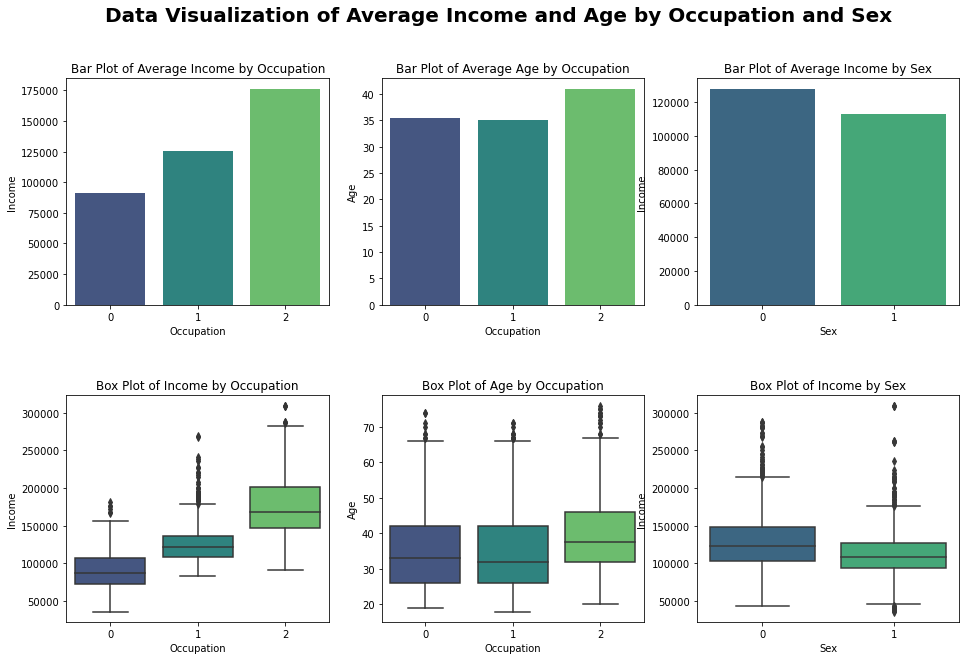

In [5]:
#-----------------------------------------------------------------------------------------------------
#--------------Ploting Bar Chart and Box Plots of Income and Age by Occupation and Sex----------------
#-----------------------------------------------------------------------------------------------------

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Increase the vertical distance between subplots
plt.subplots_adjust(hspace=0.4)

#Bar Plot 1: Income by Occupation
sns.barplot(ax=axes[0, 0], data=df, x='Occupation', y='Income', palette='viridis', ci=None)
axes[0, 0].set_title('Bar Plot of Average Income by Occupation')

# Bar Plot 2: Age by Occupation
sns.barplot(ax=axes[0, 1], data=df, x='Occupation', y='Age', palette='viridis', ci=None)
axes[0, 1].set_title('Bar Plot of Average Age by Occupation')

# Bar Plot 3: Sex by Income
sns.barplot(ax=axes[0, 2], data=df, x='Sex', y='Income', palette='viridis', ci=None)
axes[0, 2].set_title('Bar Plot of Average Income by Sex')

# Box Plot 1: Income by Occupation
sns.boxplot(ax=axes[1, 0], data=df, x='Occupation', y='Income', palette='viridis')
axes[1, 0].set_title('Box Plot of Income by Occupation')

# Box Plot 2: Age by Occupation
sns.boxplot(ax=axes[1, 1], data=df, x='Occupation', y='Age', palette='viridis')
axes[1, 1].set_title('Box Plot of Age by Occupation')

# Box Plot 3: Sex by Income
sns.boxplot(ax=axes[1, 2], data=df, x='Sex', y='Income', palette='viridis')
axes[1, 2].set_title('Box Plot of Income by Sex')

# Set main title with increased size and bold font
plt.suptitle('Data Visualization of Average Income and Age by Occupation and Sex', fontsize=20, fontweight='bold')

plt.show()


# Customer Segmentation - K-means and Hierarchical Clustering

In [6]:
# Create StandardScaler instance
scaler = StandardScaler()

# Standardize the data (mean=0, SD=1) for equal importance of features
df_std = scaler.fit_transform(df)

C:\Users\Rashrav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


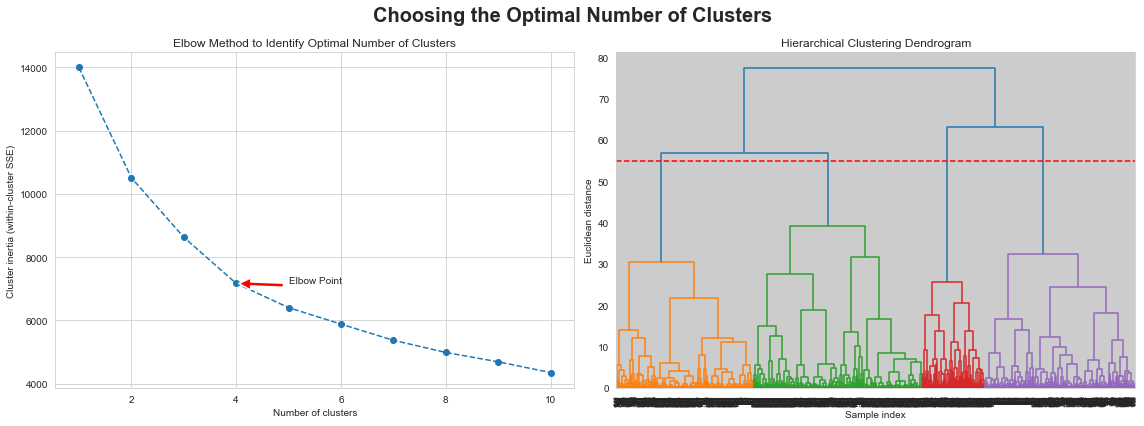

In [7]:
#---------------------------------------------------------------------------------------------------
#--------------Ploting Elbow Method and Dendogram for Optimal Cluster Determination ----------------
#---------------------------------------------------------------------------------------------------

# Set aesthetic style for plots
sns.set_style('whitegrid')

# Calculate cluster inertias for k from 1 to 10
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_std)
    inertias.append(kmeans.inertia_)

# Create subplot for Elbow Method and Hierarchical Clustering Dendrogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Elbow Method
ax1.plot(range(1, 11), inertias, marker='o', linestyle='dashed')
ax1.set_title('Elbow Method to Identify Optimal Number of Clusters')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Cluster inertia (within-cluster SSE)')
ax1.annotate('Elbow Point', xy=(4, inertias[3]), xytext=(5, inertias[3]), 
             arrowprops=dict(facecolor='red', shrink=0.05, lw=1.5))

# Calculate linkage matrix for hierarchical clustering
linkage_matrix = linkage(df_std, 'ward')

# Plot Dendrogram
dendrogram(linkage_matrix, ax=ax2)
ax2.set_title('Hierarchical Clustering Dendrogram')
ax2.set_xlabel('Sample index')
ax2.set_ylabel('Euclidean distance')
ax2.axhline(y=55, color='r', linestyle='--')  # Cutoff line

# Set main title
plt.suptitle('Choosing the Optimal Number of Clusters', fontsize=20, fontweight='bold')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


In [8]:
#----------------------------------------------------------------------------
#--------------Performing K-means and Hierarchical Clustering----------------
#----------------------------------------------------------------------------

# Run K-means with the optimal number of clusters (4) identified
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(df_std)

# Add the K-means cluster assignments to the original DataFrame
df['KMeans_Cluster'] = clusters

# Run Hierarchical clustering with the same number of clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = hc.fit_predict(df_std)

# Add the Hierarchical cluster assignments to the original DataFrame
df['Hierarchical_Cluster'] = clusters


In [9]:
#----------------------------------------------------------------------------
#-----------------Cluster Analysis for K-Means Clustering--------------------
#----------------------------------------------------------------------------

# Exclude 'Hierarchical_Cluster' column to analyze K-Means clusters
KMeans_Cluster_summary = df.drop('Hierarchical_Cluster', axis=1).groupby('KMeans_Cluster').mean()

# Naming the clusters for interpretation purposes
KMeans_Cluster_Names = {
    0: "Young Moderate Income Non-Single Females", 
    1: "Low Income Mid-Aged Individuals",
    2: "Mid-Aged High Earning Single Males",
    3: "High Income Senior Professionals"
}

# Replace numerical cluster labels with the assigned names
KMeans_Cluster_summary.rename(index=KMeans_Cluster_Names, inplace=True)

# Sort clusters by 'Age' in ascending order
KMeans_Cluster_summary = KMeans_Cluster_summary.sort_values(by='Age', ascending=True)

# Display the DataFrame
KMeans_Cluster_summary


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
KMeans_Cluster,,,,,,,
Young Moderate Income Non-Single Females,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
Low Income Mid-Aged Individuals,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
Mid-Aged High Earning Single Males,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
High Income Senior Professionals,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [10]:
#----------------------------------------------------------------------------
#-----------Cluster Analysis for Hierarchical Agglomerative Clustering-------
#----------------------------------------------------------------------------

# Exclude 'KMeans_Cluster' column to analyze Hierarchical clusters
Hierarchical_Cluster_summary = df.drop('KMeans_Cluster', axis=1).groupby('Hierarchical_Cluster').mean()

# Naming the clusters for interpretation purposes
Hierarchical_Cluster_Names = {
    0: "Low Income Mid-Aged Individuals", 
    1: "Mid-Aged High Earning Single Males",
    2: "High Income Senior Professionals",
    3: "Young Moderate Income Non-Single Females" 
}

# Replace numerical cluster labels with the assigned names
Hierarchical_Cluster_summary.rename(index=Hierarchical_Cluster_Names, inplace=True)

# Sort clusters by 'Age' in ascending order
Hierarchical_Cluster_summary = Hierarchical_Cluster_summary.sort_values(by='Age', ascending=True)

# Display the DataFrame
Hierarchical_Cluster_summary


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Hierarchical_Cluster,,,,,,,
Young Moderate Income Non-Single Females,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691
Low Income Mid-Aged Individuals,0.640986,0.445300,34.583975,0.992296,90807.328197,0.101695,0.023112
Mid-Aged High Earning Single Males,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
High Income Senior Professionals,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917


In [11]:
#----------------------------------------------------------------------------
#---------------------Performing Principal Component Analysis-----------------
#----------------------------------------------------------------------------

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the standardized data
pca_result = pca.fit_transform(df_std)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Append cluster assignments to the PCA results DataFrame
pca_df['KMeans_Cluster'] = df['KMeans_Cluster']
pca_df['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

# Replace numerical cluster labels with the assigned names for interpretability
pca_df['KMeans_Cluster'] = pca_df['KMeans_Cluster'].map(KMeans_Cluster_Names)
pca_df['Hierarchical_Cluster'] = pca_df['Hierarchical_Cluster'].map(Hierarchical_Cluster_Names)


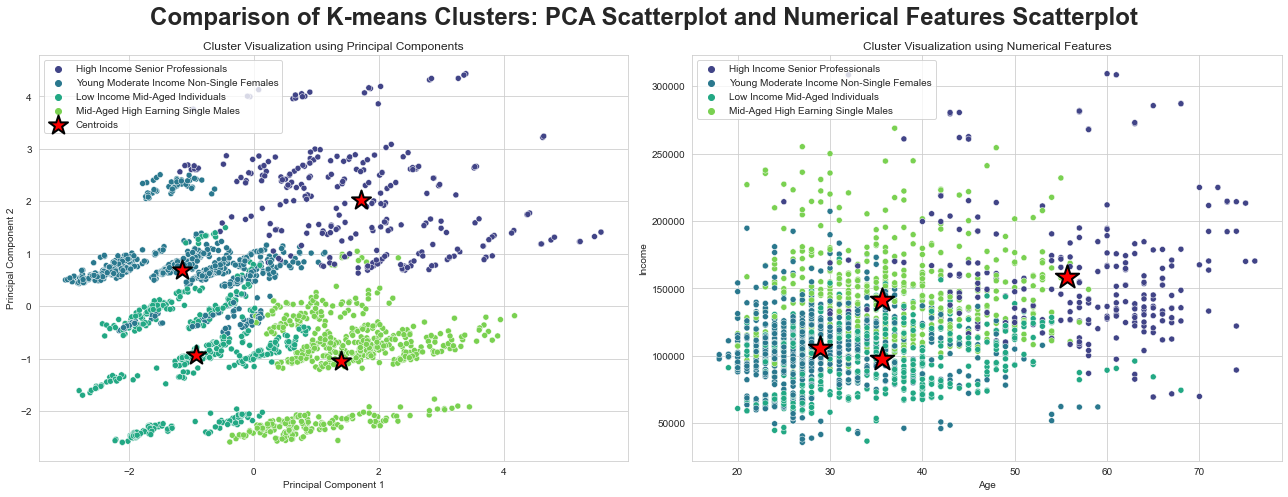

In [12]:
#----------------------------------------------------------------------------
#-------------Visualizing K-means Clusters: PCA and Numerical Features-------
#----------------------------------------------------------------------------

# Replacing numeric cluster labels with meaningful names in the DataFrame
df['KMeans_Cluster'] = df['KMeans_Cluster'].map(KMeans_Cluster_Names)
df['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].map(Hierarchical_Cluster_Names)

# Calculating cluster centroids for plotting
centroids = df.groupby('KMeans_Cluster').mean()

# Defining colors for centroids
centroid_colors = {0: 'red', 1: 'red', 2: 'red', 3: 'red'}

# Setting up figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1 - Visualizing clusters using Principal Components
# Transforming cluster centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plotting data points and centroids based on the first two principal components
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', ax=ax1)
ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=400, color='red', edgecolor='black', linewidths=2, label='Centroids')
ax1.set_title('Cluster Visualization using Principal Components')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()

# Plot 2 - Visualizing clusters using Age and Income features
sns.scatterplot(data=df, x='Age', y='Income', hue='KMeans_Cluster', palette='viridis', ax=ax2)

# Adding centroids to the plot
for cluster, color in zip(centroids.index, centroid_colors.values()):
    ax2.scatter(centroids.loc[cluster, 'Age'], centroids.loc[cluster, 'Income'], c=color, marker='*', s=600, edgecolor='black', linewidths=2)

ax2.set_title('Cluster Visualization using Numerical Features')
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.legend()

# Set the main title for the figure
fig.suptitle('Comparison of K-means Clusters: PCA Scatterplot and Numerical Features Scatterplot', fontsize=24, fontweight='bold')

# Adjust spacing between subplots if necessary
plt.tight_layout()

# Show the figure
plt.show()

## Comparison between K means and Hierarchical Clustering

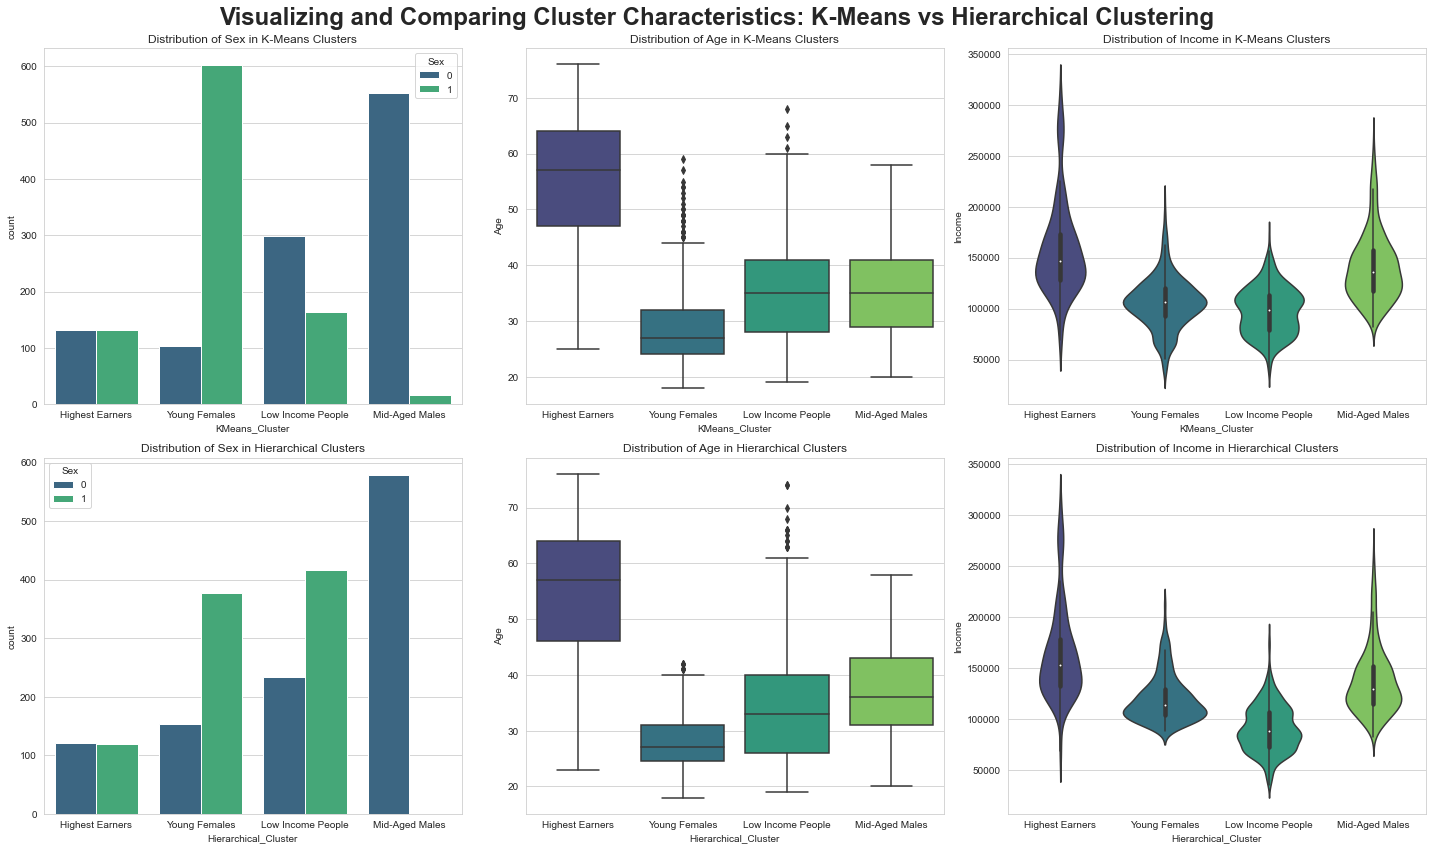

In [13]:
#----------------------------------------------------------------------------
#---------Visualizing and Comparing Cluster Characteristics------------------
#----------------------------------------------------------------------------

# Define shorter cluster names for better visualization
short_labels = {
    'Young Moderate Income Non-Single Females': 'Young Females',
    'Mid-Aged High Earning Single Males': 'Mid-Aged Males',
    'Low Income Mid-Aged Individuals': 'Low Income People',
    'High Income Senior Professionals': 'Highest Earners'
}

# Create a copy of the original DataFrame
df_copy = df.copy()

# Replace long cluster names with short names in the copied DataFrame
df_copy['KMeans_Cluster'] = df_copy['KMeans_Cluster'].map(short_labels)
df_copy['Hierarchical_Cluster'] = df_copy['Hierarchical_Cluster'].map(short_labels)

# Prepare the figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Visualization for K-Means Clusters
# 1. Sex Distribution per Cluster
sns.countplot(ax=axes[0, 0], x='KMeans_Cluster', hue='Sex', palette='viridis', data=df_copy)
axes[0, 0].set_title('Distribution of Sex in K-Means Clusters')

# 2. Age Distribution per Cluster
sns.boxplot(ax=axes[0, 1], x='KMeans_Cluster', y='Age', palette='viridis', data=df_copy)
axes[0, 1].set_title('Distribution of Age in K-Means Clusters')

# 3. Income Distribution per Cluster
sns.violinplot(ax=axes[0, 2], x='KMeans_Cluster', y='Income', palette='viridis', data=df_copy)
axes[0, 2].set_title('Distribution of Income in K-Means Clusters')

# Visualization for Hierarchical Clusters
# 1. Sex Distribution per Cluster
sns.countplot(ax=axes[1, 0], x='Hierarchical_Cluster', hue='Sex', palette='viridis', data=df_copy)
axes[1, 0].set_title('Distribution of Sex in Hierarchical Clusters')

# 2. Age Distribution per Cluster
sns.boxplot(ax=axes[1, 1], x='Hierarchical_Cluster', y='Age', palette='viridis', data=df_copy)
axes[1, 1].set_title('Distribution of Age in Hierarchical Clusters')

# 3. Income Distribution per Cluster
sns.violinplot(ax=axes[1, 2], x='Hierarchical_Cluster', y='Income', palette='viridis', data=df_copy)
axes[1, 2].set_title('Distribution of Income in Hierarchical Clusters')

# Set main title for the figure
plt.suptitle('Visualizing and Comparing Cluster Characteristics: K-Means vs Hierarchical Clustering', fontsize=24, fontweight='bold')

# Adjust subplot layout
plt.tight_layout()

# Display the figure
plt.show()

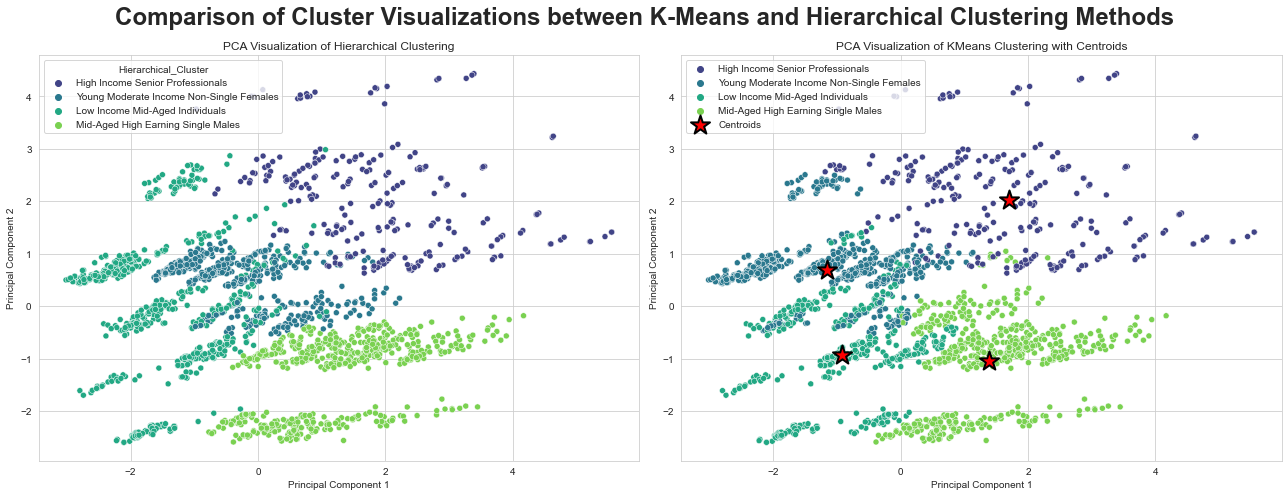

In [14]:
#-------------------------------------------------------------------------------------------------
#---------Visualizing Clusters generated by the Two Clustering Methods using PCA------------------
#-------------------------------------------------------------------------------------------------

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1 - Principal Components from Hierarchical Clustering
# This scatterplot visualizes the clusters formed from Hierarchical Clustering using PCA
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical_Cluster', palette='viridis', ax=ax1)
ax1.set_title('PCA Visualization of Hierarchical Clustering')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Plot 2 - Principal Components from KMeans Clustering with Centroids
# This scatterplot visualizes the clusters and centroids formed from KMeans Clustering using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', ax=ax2)
ax2.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*',edgecolor='black', s=400, color='red',linewidths=2, label='Centroids')
ax2.set_title('PCA Visualization of KMeans Clustering with Centroids')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

# Set main title for the figure
fig.suptitle('Comparison of Cluster Visualizations between K-Means and Hierarchical Clustering Methods', fontsize=24, fontweight='bold')

# Adjust subplot layout
plt.tight_layout() 

# Display the figure
plt.show()
